In [1]:
%pylab inline

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [2]:
import orbit_analysis

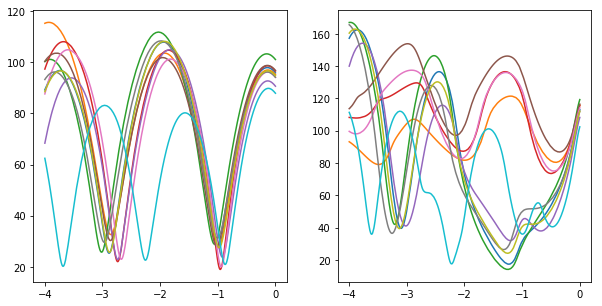

In [6]:
Theta = np.zeros(10)
r_rel_mins = np.zeros(10)
t_min_rel = np.zeros(10)
peris = np.zeros(10)
apos = np.zeros(10)

figure(figsize=(10,5))
for i in range(10,20):
    t, posNGC, velNGC, posSag, velSag, d_rel = orbit_analysis.load_orbit('../orbits/MWlLMC4Sgr_ICs10{}.txt'.format(str(i)))
    Theta[i-10] = orbit_analysis.angles(t, posNGC, velNGC, posSag, velSag)
    t_min_rel[i-10] , r_rel_mins[i-10] = orbit_analysis.min_dist(t, d_rel)
    NGC_r_G = np.sqrt(posNGC[:,0]**2 + posNGC[:,1]**2 + posNGC[:,2]**2)
    peris[i-10] , apos[i-10] = orbit_analysis.orbit_properties(t, NGC_r_G)
    subplot(1, 2, 1)
    plot(t, NGC_r_G)
    subplot(1, 2, 2)
    plot(t, d_rel)


In [7]:
print(peris)
print(apos)
print(Theta)
print(r_rel_mins)

[ 26.63193855  30.10184844  27.33401669  20.54858109  23.39912321
  29.17423489  21.53926839  30.44118087  26.64394979  21.28623012]
[ 100.83928847  105.35095379  105.36393688  103.75694696   97.14874875
  101.35556625  100.74073165  100.21374923  100.45830193   84.36917711]
[ 21.16050818  15.1639453   11.76251438  49.30814925  36.82681372
  28.60818385  33.94147118  28.1114407   28.01810111  40.64339839]
[ 21.16050818  15.1639453   11.76251438  49.30814925  36.82681372
  28.60818385  33.94147118  28.1114407   28.01810111  40.64339839]
[ 17.40228233  79.11308226  14.13056824  73.5537169   31.96163289
  86.8534903   75.04265162  26.39088379  24.12264567  17.56523565]


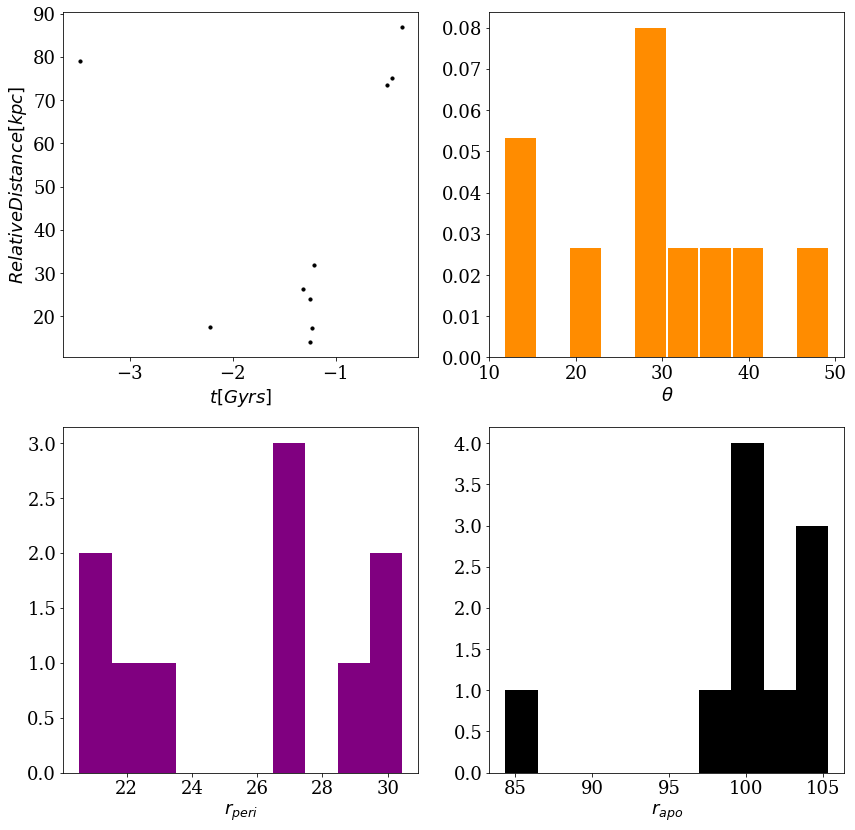

In [49]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.scatter(t_min_rel, r_rel_mins, c='k', s=10)
plt.ylabel('$Relative Distance [kpc]$')
plt.xlabel(r'$t[Gyrs]$')


plt.subplot(2, 2, 2)
h = plt.hist(Theta, color='darkorange', rwidth=0.95, normed=True)
plt.xlabel(r'$\theta$')


plt.subplot(2, 2, 3)
h2 = plt.hist(peris, color='purple')
plt.xlabel('$r_{peri}$')

plt.subplot(2, 2, 4)
h3 = plt.hist(apos, color='k')
plt.xlabel('$r_{apo}$')


In [47]:
plt.hist?